# Valutazione prestazioni dei modelli selezionati

In [37]:
# Carico i modelli e i dati di test
import joblib
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('..\\data\\data.csv')
features = ['wind_direction', 'concentration','U', 'q']
target = 'distance'
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_distance = joblib.load('rf_distance_model.pkl')
svm = joblib.load('svm_model.pkl')
knn = joblib.load('knn_model.pkl')

kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [38]:
from sklearn.preprocessing import LabelEncoder

result = {}

for name, model in {
    'Random Forest': rf_distance,
    'SVM': svm,
    'k-NN': knn
}.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    result[name] = {
        'Test Accuracy': accuracy,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'CV Scores': cv_scores,
        'Classification_Report': classification_report(y_test_enc, y_pred, output_dict=True),
    }
    print(f"{name} Test Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:\n", result[name]['Classification_Report'])

results_df = pd.DataFrame({
    name: {
        'Test Accuracy': res['Test Accuracy'],
        'CV Mean': res['CV Mean'],
        'CV Std': res['CV Std']
    }
    for name, res in result.items()
}).T
results_df = results_df.sort_values('Test Accuracy', ascending=False)


c:\Users\abbon\miniconda3\envs\DA\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abbon\miniconda3\envs\DA\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abbon\miniconda3\envs\DA\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abbon\minico

Random Forest Test Accuracy: 0.7623
Random Forest Classification Report:
 {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 234.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 182.0}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 152.0}, '50': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, '100': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, '200': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, 'accuracy': 0.0, 'macro avg': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 568.0}, 'weighted avg': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 568.0}}
SVM Test Accuracy: 0.4155
SVM Classification Report:
 {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 234.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 182.0}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 152.0}, '50': {'pr

c:\Users\abbon\miniconda3\envs\DA\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abbon\miniconda3\envs\DA\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abbon\miniconda3\envs\DA\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abbon\minico

C:\Users\abbon\AppData\Local\Temp\ipykernel_34912\3486224466.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_scores_list, labels=[name[:10] for name in results_df.index])


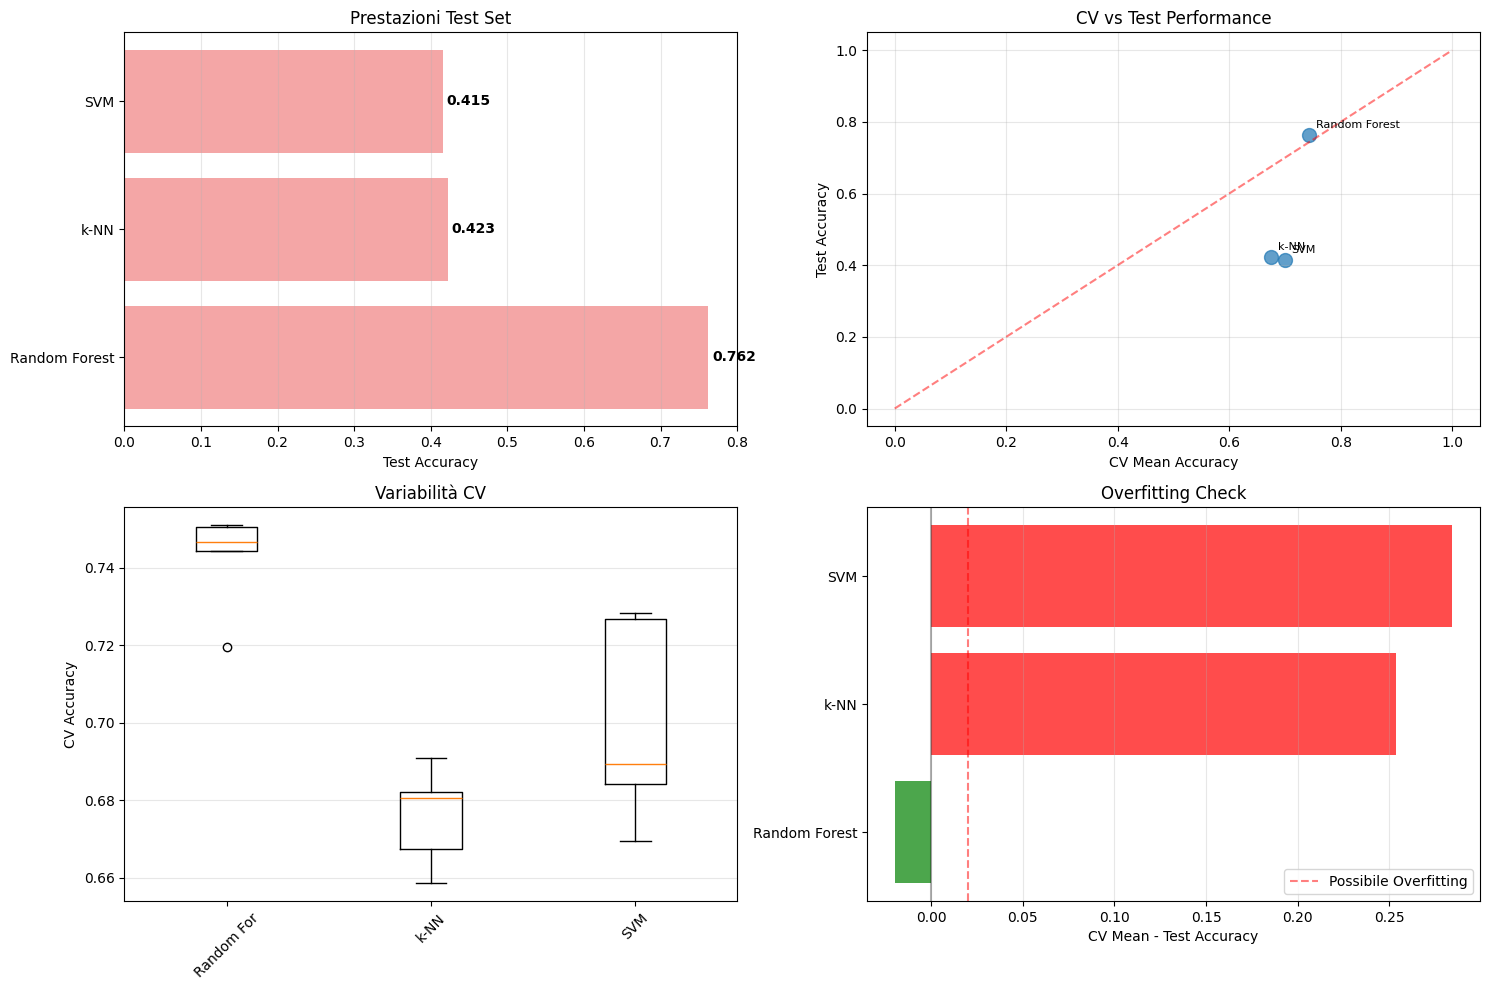

In [39]:
plt.figure(figsize=(15, 10))

# Grafico 1: Confronto accuratezze
plt.subplot(2, 2, 1)
x_pos = range(len(results_df))
plt.barh(x_pos, results_df['Test Accuracy'], alpha=0.7, color='lightcoral')
plt.yticks(x_pos, results_df.index)
plt.xlabel('Test Accuracy')
plt.title('Prestazioni Test Set')
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['Test Accuracy']):
    plt.text(v + 0.005, i, f'{v:.3f}', va='center', fontweight='bold')

# Grafico 2: CV Mean vs Test Accuracy
plt.subplot(2, 2, 2)
plt.scatter(results_df['CV Mean'], results_df['Test Accuracy'], s=100, alpha=0.7)
for i, txt in enumerate(results_df.index):
    plt.annotate(txt, (results_df['CV Mean'].iloc[i], results_df['Test Accuracy'].iloc[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.xlabel('CV Mean Accuracy')
plt.ylabel('Test Accuracy')
plt.title('CV vs Test Performance')
plt.plot([0, 1], [0, 1], 'r--', alpha=0.5)
plt.grid(alpha=0.3)

# Grafico 3: Box plot delle CV scores
plt.subplot(2, 2, 3)
cv_scores_list = [result[name]['CV Scores'] for name in results_df.index]
plt.boxplot(cv_scores_list, labels=[name[:10] for name in results_df.index])
plt.ylabel('CV Accuracy')
plt.title('Variabilità CV')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Grafico 4: Differenza CV-Test
plt.subplot(2, 2, 4)
diff = results_df['CV Mean'] - results_df['Test Accuracy']
colors = ['red' if x > 0.02 else 'orange' if x > 0.01 else 'green' for x in diff]
plt.barh(range(len(diff)), diff, color=colors, alpha=0.7)
plt.yticks(range(len(diff)), results_df.index)
plt.xlabel('CV Mean - Test Accuracy')
plt.title('Overfitting Check')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=0.02, color='red', linestyle='--', alpha=0.5, label='Possibile Overfitting')
plt.legend()
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()